In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

In [6]:
from scipy import stats
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [8]:
dataset= pd.read_csv (r"C:\Users\Israel Shingenge\Documents\Applicatons\archive\user_behavior_dataset.csv")

In [9]:
dataset

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [10]:
print(dataset.isnull().sum())

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


<Axes: >

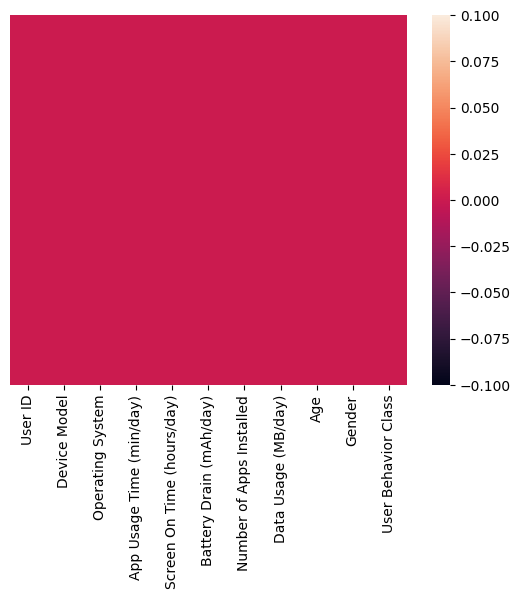

In [12]:
sns.heatmap(dataset.isnull(),yticklabels=False)

In [15]:
unique_counts = dataset.nunique()
print(unique_counts)

User ID                       700
Device Model                    5
Operating System                2
App Usage Time (min/day)      387
Screen On Time (hours/day)    108
Battery Drain (mAh/day)       628
Number of Apps Installed       86
Data Usage (MB/day)           585
Age                            42
Gender                          2
User Behavior Class             5
dtype: int64


In [17]:
unique_counts = dataset.nunique()
print(unique_counts)

User ID                       700
Device Model                    5
Operating System                2
App Usage Time (min/day)      387
Screen On Time (hours/day)    108
Battery Drain (mAh/day)       628
Number of Apps Installed       86
Data Usage (MB/day)           585
Age                            42
Gender                          2
User Behavior Class             5
dtype: int64


In [18]:
print("Duplicate Rows:", dataset.duplicated().sum())

Duplicate Rows: 0


In [19]:
print(dataset.describe())

         User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  700.00000                700.000000                  700.000000   
mean   350.50000                271.128571                    5.272714   
std    202.21688                177.199484                    3.068584   
min      1.00000                 30.000000                    1.000000   
25%    175.75000                113.250000                    2.500000   
50%    350.50000                227.500000                    4.900000   
75%    525.25000                434.250000                    7.400000   
max    700.00000                598.000000                   12.000000   

       Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
count               700.000000                700.000000           700.000000   
mean               1525.158571                 50.681429           929.742857   
std                 819.136414                 26.943324           640.451729   
min      

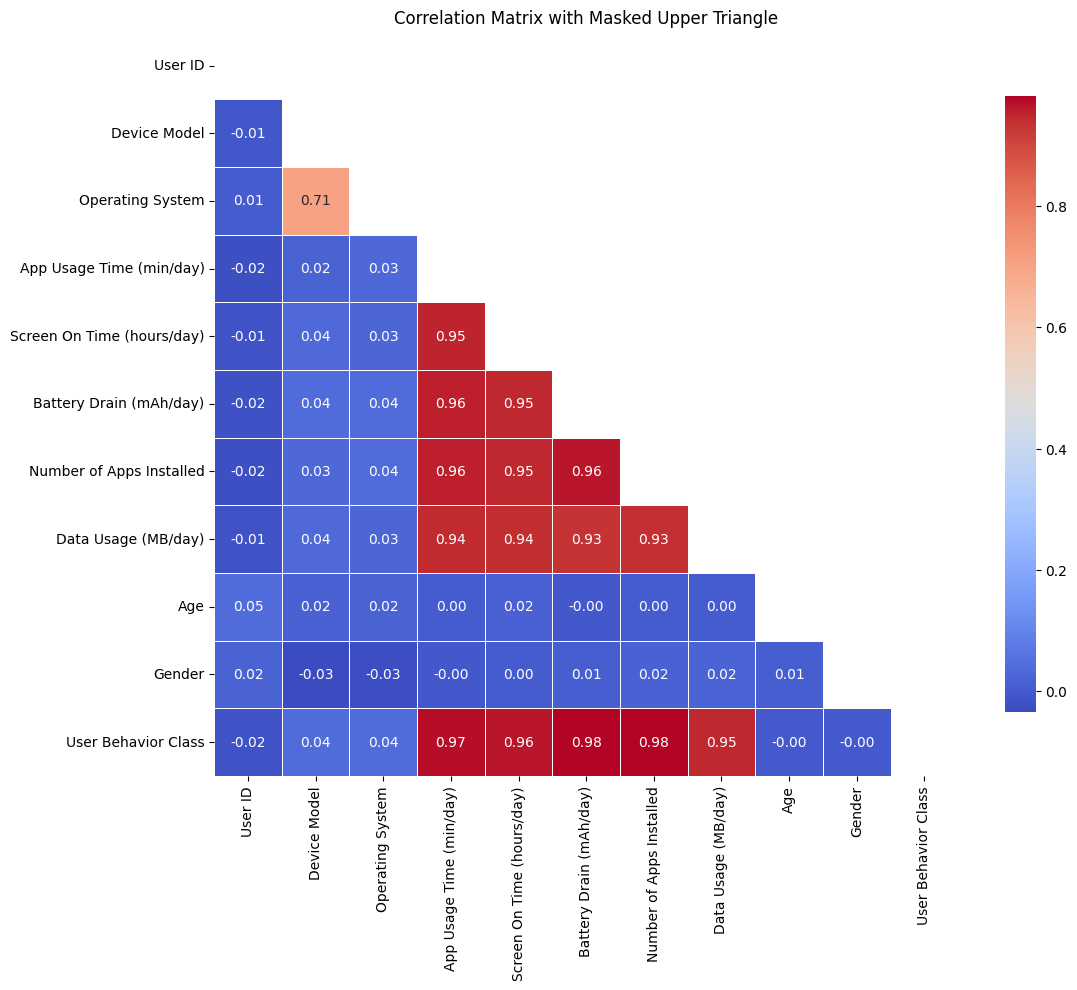

In [31]:
corr_matrix = dataset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the heatmap
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f",  # Format the annotations to 2 decimal places
            mask=mask, 
            cmap='coolwarm', 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .8})

plt.title('Correlation Matrix with Masked Upper Triangle')
plt.show()

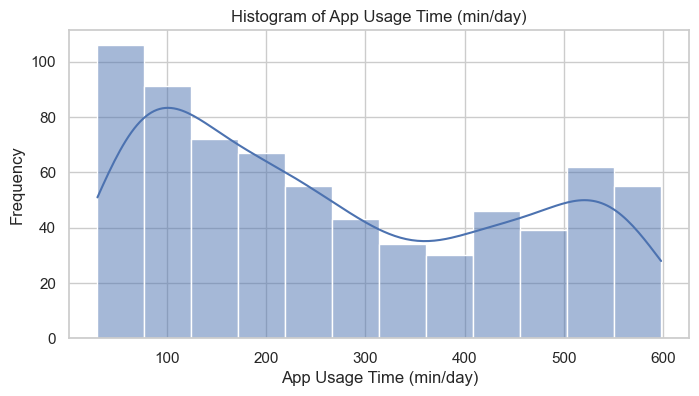

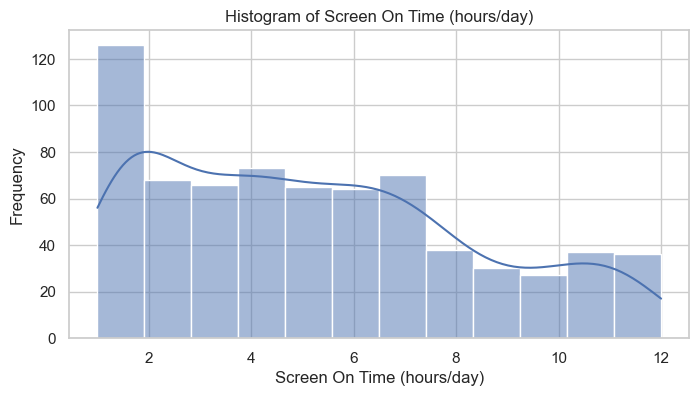

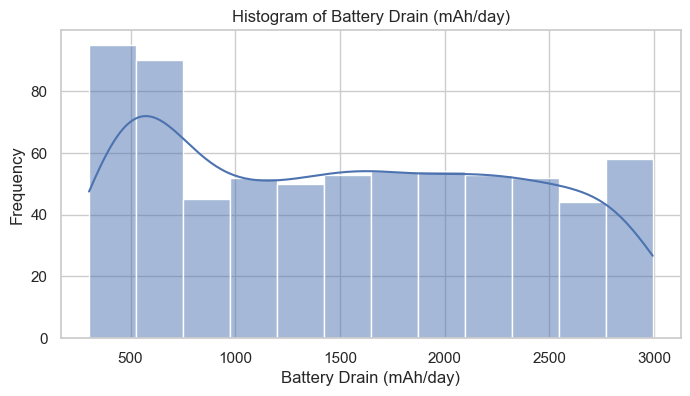

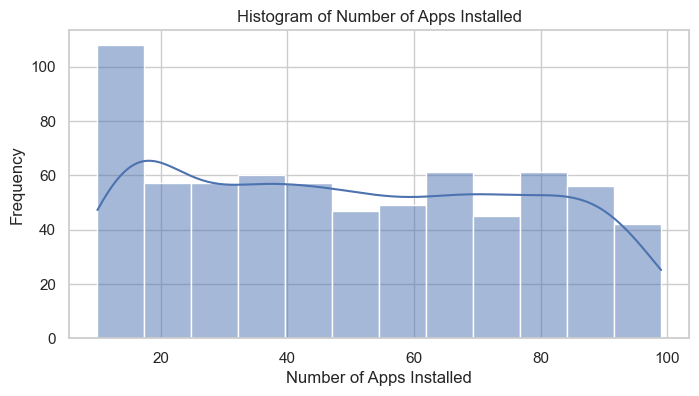

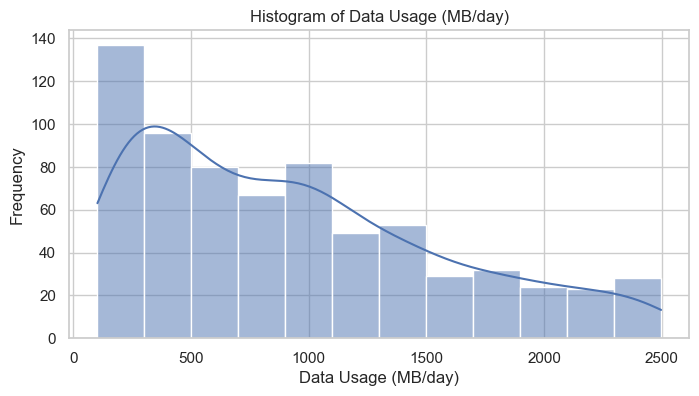

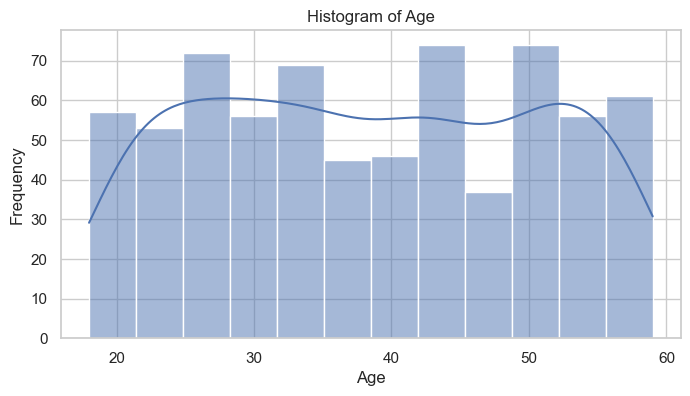

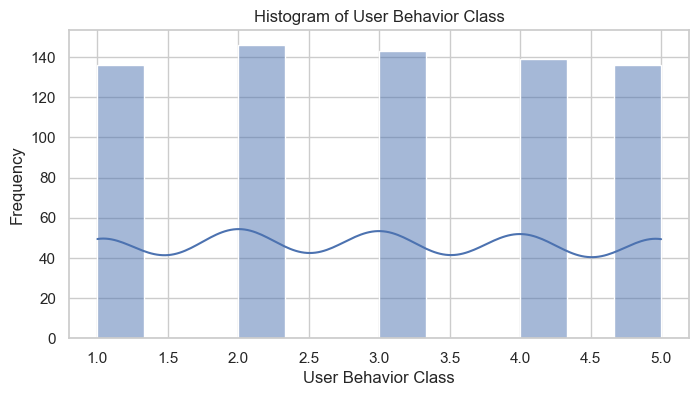

In [25]:
sns.set(style="whitegrid")

numerical_columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age','User Behavior Class']

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[column], bins=12, kde=True) 
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [29]:
categorical_columns = ['Device Model','Operating System','Gender'   
]
le = LabelEncoder()

for col in categorical_columns:
    dataset[col] = le.fit_transform(dataset[col])



In [29]:
array = dataset.values
X = array[:, 0:10]
Y = array[:,10]

In [31]:
validation_size = 0.20
seed = 21
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = validation_size, random_state = seed)

print("X train", X_train)
print("Y validation", X_validation)
print("Y train", Y_train)
print("Y validation", Y_validation)

X train [[4.700e+02 3.000e+00 0.000e+00 ... 2.940e+02 3.700e+01 1.000e+00]
 [3.800e+02 1.000e+00 0.000e+00 ... 3.130e+02 5.100e+01 1.000e+00]
 [1.140e+02 2.000e+00 0.000e+00 ... 4.040e+02 4.200e+01 1.000e+00]
 ...
 [3.690e+02 1.000e+00 0.000e+00 ... 4.080e+02 4.900e+01 0.000e+00]
 [4.900e+01 0.000e+00 0.000e+00 ... 2.262e+03 4.900e+01 1.000e+00]
 [2.080e+02 0.000e+00 0.000e+00 ... 4.190e+02 2.300e+01 1.000e+00]]
Y validation [[3.830e+02 1.000e+00 0.000e+00 ... 2.990e+02 3.700e+01 0.000e+00]
 [6.540e+02 2.000e+00 0.000e+00 ... 1.440e+02 2.900e+01 1.000e+00]
 [4.490e+02 2.000e+00 0.000e+00 ... 3.060e+02 2.200e+01 0.000e+00]
 ...
 [1.400e+02 0.000e+00 0.000e+00 ... 1.796e+03 5.300e+01 1.000e+00]
 [8.000e+01 0.000e+00 0.000e+00 ... 9.890e+02 3.400e+01 0.000e+00]
 [3.840e+02 1.000e+00 0.000e+00 ... 3.220e+02 3.000e+01 1.000e+00]]
Y train [1. 2. 2. 5. 3. 5. 3. 5. 3. 3. 2. 2. 4. 1. 5. 5. 1. 3. 2. 1. 4. 5. 3. 5.
 2. 1. 2. 2. 1. 4. 5. 5. 5. 2. 2. 1. 5. 4. 4. 4. 2. 5. 2. 2. 5. 1. 2. 1.
 2. 2. 4.

In [33]:
seed = 21
scoring = 'accuracy'

In [35]:

models = [] #This creates an empty list
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# print(models)
# evaluate each model in turn
results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LDA: 1.000000 (0.000000)
KNN: 0.998214 (0.005357)
CART: 0.994643 (0.008183)
NB: 1.000000 (0.000000)
SVM: 1.000000 (0.000000)


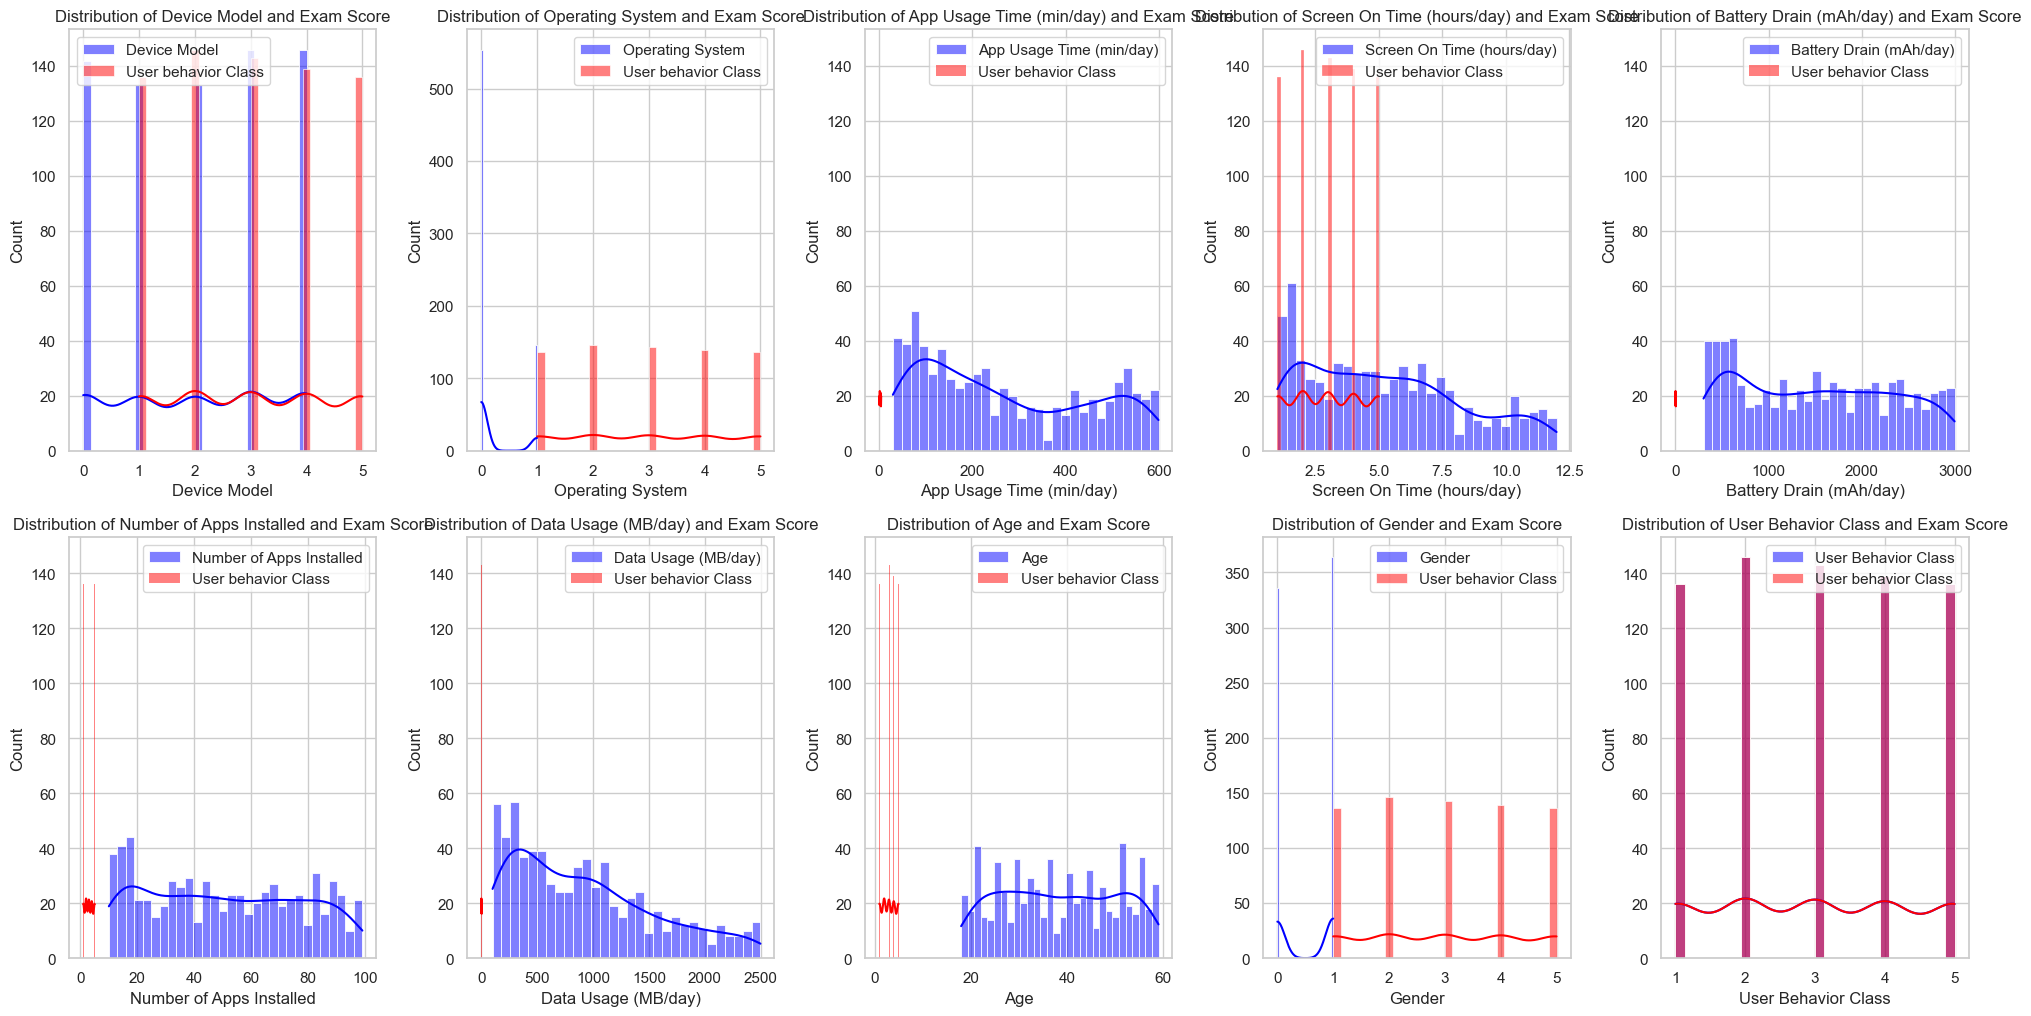

In [41]:
features = [
    'Device Model','Operating System','App Usage Time (min/day)',	'Screen On Time (hours/day)','Battery Drain (mAh/day)','Number of Apps Installed','Data Usage (MB/day)','Age','Gender',	'User Behavior Class'

]

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Loop through features to create histograms
for i, feature in enumerate(features, 1):
    plt.subplot(4, 5, i)  # Adjust subplot grid as necessary
    sns.histplot(dataset[feature], kde=True, color='blue', label=feature, bins=30)
    sns.histplot(dataset['User Behavior Class'], kde=True, color='red', label='User behavior Class', bins=30)
    plt.title(f'Distribution of {feature} and Exam Score')
    plt.legend()

plt.tight_layout()
plt.show()

In [43]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train and Y_train are your features and labels
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define models
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))  # Adding Random Forest

# Hyperparameter tuning for Random Forest (optional)
param_grid = {
    'n_estimators': [50, 100, 200],   # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required to be at a leaf node
}

# Evaluate each model
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    
    # If model is Random Forest, perform hyperparameter tuning
    if name == 'Random Forest':
        grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='f1_macro')
        grid_search.fit(X_train_scaled, Y_train)
        best_model = grid_search.best_estimator_  # Get the best model
        cv_results = cross_val_score(best_model, X_train_scaled, Y_train, cv=kfold, scoring='f1_macro')
    else:
        cv_results = cross_val_score(model, X_train_scaled, Y_train, cv=kfold, scoring='f1_macro')
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LDA: 1.000000 (0.000000)
KNN: 0.959201 (0.024052)
CART: 0.991214 (0.011157)
NB: 1.000000 (0.000000)
SVM: 1.000000 (0.000000)


C:\Users\Israel Shingenge\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Israel Shingenge\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Israel Shingenge\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Israel Shingenge\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
 

Random Forest: 1.000000 (0.000000)


In [44]:
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print("\t=============================================\n")
print(confusion_matrix(Y_validation, predictions))
print("\t=============================================\n")
print(classification_report(Y_validation, predictions))

1.0

[[25  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 33  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 20]]

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        25
         2.0       1.00      1.00      1.00        34
         3.0       1.00      1.00      1.00        33
         4.0       1.00      1.00      1.00        28
         5.0       1.00      1.00      1.00        20

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [47]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print("\t=============================================\n")
print(confusion_matrix(Y_validation, predictions))
print("\t=============================================\n")
print(classification_report(Y_validation, predictions))

0.9928571428571429

[[25  0  0  0  0]
 [ 1 33  0  0  0]
 [ 0  0 33  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 20]]

              precision    recall  f1-score   support

         1.0       0.96      1.00      0.98        25
         2.0       1.00      0.97      0.99        34
         3.0       1.00      1.00      1.00        33
         4.0       1.00      1.00      1.00        28
         5.0       1.00      1.00      1.00        20

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



In [53]:
dataset 

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,0,393,6.4,1872,67,1122,40,1,4
1,2,1,0,268,4.7,1331,42,944,47,0,3
2,3,3,0,154,4.0,761,32,322,42,1,2
3,4,0,0,239,4.8,1676,56,871,20,1,3
4,5,4,1,187,4.3,1367,58,988,31,0,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,4,1,92,3.9,1082,26,381,22,1,2
696,697,3,0,316,6.8,1965,68,1201,59,1,4
697,698,0,0,99,3.1,942,22,457,50,0,2
698,699,2,0,62,1.7,431,13,224,44,1,1


In [61]:
dataset.drop(['User ID'])

KeyError: "['User ID'] not found in axis"

In [57]:
print(dataset.columns)

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')


In [63]:
dataset = dataset.drop(columns=['User ID'])


In [65]:
dataset

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0,0,393,6.4,1872,67,1122,40,1,4
1,1,0,268,4.7,1331,42,944,47,0,3
2,3,0,154,4.0,761,32,322,42,1,2
3,0,0,239,4.8,1676,56,871,20,1,3
4,4,1,187,4.3,1367,58,988,31,0,3
...,...,...,...,...,...,...,...,...,...,...
695,4,1,92,3.9,1082,26,381,22,1,2
696,3,0,316,6.8,1965,68,1201,59,1,4
697,0,0,99,3.1,942,22,457,50,0,2
698,2,0,62,1.7,431,13,224,44,1,1


In [67]:
dataset.columns.tolist()

['Device Model',
 'Operating System',
 'App Usage Time (min/day)',
 'Screen On Time (hours/day)',
 'Battery Drain (mAh/day)',
 'Number of Apps Installed',
 'Data Usage (MB/day)',
 'Age',
 'Gender',
 'User Behavior Class']

In [69]:
dataset

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0,0,393,6.4,1872,67,1122,40,1,4
1,1,0,268,4.7,1331,42,944,47,0,3
2,3,0,154,4.0,761,32,322,42,1,2
3,0,0,239,4.8,1676,56,871,20,1,3
4,4,1,187,4.3,1367,58,988,31,0,3
...,...,...,...,...,...,...,...,...,...,...
695,4,1,92,3.9,1082,26,381,22,1,2
696,3,0,316,6.8,1965,68,1201,59,1,4
697,0,0,99,3.1,942,22,457,50,0,2
698,2,0,62,1.7,431,13,224,44,1,1


In [71]:
array = dataset.values
X = array[:, 0:9]
Y = array[:,9]

In [73]:
validation_size = 0.20
seed = 21
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = validation_size, random_state = seed)

print("X train", X_train)
print("Y validation", X_validation)
print("Y train", Y_train)
print("Y validation", Y_validation)

X train [[3.000e+00 0.000e+00 3.900e+01 ... 2.940e+02 3.700e+01 1.000e+00]
 [1.000e+00 0.000e+00 1.060e+02 ... 3.130e+02 5.100e+01 1.000e+00]
 [2.000e+00 0.000e+00 1.360e+02 ... 4.040e+02 4.200e+01 1.000e+00]
 ...
 [1.000e+00 0.000e+00 1.020e+02 ... 4.080e+02 4.900e+01 0.000e+00]
 [0.000e+00 0.000e+00 5.800e+02 ... 2.262e+03 4.900e+01 1.000e+00]
 [0.000e+00 0.000e+00 1.630e+02 ... 4.190e+02 2.300e+01 1.000e+00]]
Y validation [[1.000e+00 0.000e+00 8.400e+01 ... 2.990e+02 3.700e+01 0.000e+00]
 [2.000e+00 0.000e+00 4.900e+01 ... 1.440e+02 2.900e+01 1.000e+00]
 [2.000e+00 0.000e+00 1.520e+02 ... 3.060e+02 2.200e+01 0.000e+00]
 ...
 [0.000e+00 0.000e+00 5.160e+02 ... 1.796e+03 5.300e+01 1.000e+00]
 [0.000e+00 0.000e+00 2.300e+02 ... 9.890e+02 3.400e+01 0.000e+00]
 [1.000e+00 0.000e+00 1.040e+02 ... 3.220e+02 3.000e+01 1.000e+00]]
Y train [1. 2. 2. 5. 3. 5. 3. 5. 3. 3. 2. 2. 4. 1. 5. 5. 1. 3. 2. 1. 4. 5. 3. 5.
 2. 1. 2. 2. 1. 4. 5. 5. 5. 2. 2. 1. 5. 4. 4. 4. 2. 5. 2. 2. 5. 1. 2. 1.
 2. 2. 4.

In [75]:
seed = 21
scoring = 'accuracy'

In [98]:

models = [] #This creates an empty list
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# print(models)
# evaluate each model in turn
results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=15, random_state=seed, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LDA: 1.000000 (0.000000)
KNN: 1.000000 (0.000000)
CART: 0.994689 (0.010622)
NB: 1.000000 (0.000000)
SVM: 1.000000 (0.000000)


In [89]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print("\t=============================================\n")
print(confusion_matrix(Y_validation, predictions))
print("\t=============================================\n")
print(classification_report(Y_validation, predictions))

1.0

[[25  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 33  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 20]]

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        25
         2.0       1.00      1.00      1.00        34
         3.0       1.00      1.00      1.00        33
         4.0       1.00      1.00      1.00        28
         5.0       1.00      1.00      1.00        20

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [100]:
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print("\t=============================================\n")
print(confusion_matrix(Y_validation, predictions))
print("\t=============================================\n")
print(classification_report(Y_validation, predictions))

1.0

[[25  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 33  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 20]]

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        25
         2.0       1.00      1.00      1.00        34
         3.0       1.00      1.00      1.00        33
         4.0       1.00      1.00      1.00        28
         5.0       1.00      1.00      1.00        20

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

